  Using cached https://files.pythonhosted.org/packages/33/f0/6e2c00afda860f655fbf0f795f7310bdbf12122846344dfdc803fc7455d5/jupyter_contrib_nbextensions-0.5.1-py2.py3-none-any.whl
     |████████████████████████████████| 870kB 7.8MB/s 
     |████████████████████████████████| 481kB 16.4MB/s 
  Created wheel for jupyter-latex-envs: filename=jupyter_latex_envs-1.4.6-py2.py3-none-any.whl size=963414 sha256=b68ae43afc7d26486b5d2cc8ec3118a676ea7e27a89696f32ae0f282e76bd79d
  Stored in directory: /root/.cache/pip/wheels/0d/71/2a/164491997299b9f2479a251e254323fe35d946779e18f27956
  Created wheel for jupyter-nbextensions-configurator: filename=jupyter_nbextensions_configurator-0.4.1-py2.py3-none-any.whl size=465843 sha256=407b10045de334279df7502db524ddf8fad6916de6dc530621ef8af44ff2f4c3
  Stored in directory: /root/.cache/pip/wheels/15/df/fe/2a74fe34709e7fdc5ae153a768675d9fda93cc7d5133ed1fb0
Successfully built jupyter-latex-envs jupyter-nbextensions-configurator
/bin/bash: jupyter_contrib_nbextensio

In [ ]:
#Creating Coding Environment
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from google.colab import files
import seaborn as sns
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import normalize
from scipy.stats import kruskal
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import  metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.dummy import  DummyClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import  preprocessing


#Background:
 
Cervical Cancer kills over 300,000 women each year around the world. With early detection survival rates increase exponentially. Thanks to tests such as 'pap smears' and  Schillers, cervical cancer deaths have been decreasing.
 
However even with pap smears and Schiller's test some cases still go undiagnosed, and a false positive result on a pap smear causes unnecessary procedures, expenses, and worry to the patient.  Pap smears lead to 4 women in 1,000 going undiagnosed and 95 in 1,000 false positives(Grimes et al, 2020).


#GOAL:
Use pap smear and shiller test results along with medical history to limit false positives and undiagnosed cases. 


# Data 
The data was obtained from kaggle: [LINK](https://www.kaggle.com/loveall/cervical-cancer-risk-classification)
 
There are 36 columns with 858 rows of data. While at first glance no NaN data is present, there seems to be some odd values in the dataframe. After taking a look at the excel file, whoever entered the data used to fill in missing values. These '?' were converted to nan and handled appropriately.


In [ ]:
#Uploading CSV file with Data 
upload_1 = files.upload()

Saving risk_factors_cervical_cancer.csv to risk_factors_cervical_cancer.csv


In [ ]:
#Creating data frame 
risk_df = pd.read_csv(io.BytesIO(upload_1['risk_factors_cervical_cancer.csv']))

In [ ]:
risk_df.shape
'''36 columns of 858 people'''


'36 columns of 858 people'

In [ ]:
risk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [ ]:
risk_df.isna().sum()
''' While there are no values stored as null, from glancing over CSV i know 
there are at least a few values with ? s stored'''

' While there are no values stored as null, from glancing over CSV i know \nthere are at least a few values with ? s stored'

In [ ]:
risk_df.where(risk_df=='?')
#''' Converting ?s to  Nan '''


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,?,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,?,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,?,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,?,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,?,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,?,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,?,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,?,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,?,?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
risk_df = risk_df.replace(to_replace='?', value= np.nan)
'''Counting number of Nana Values'''
risk_df.isnull().sum()/858*100

Age                                    0.000000
Number of sexual partners              3.030303
First sexual intercourse               0.815851
Num of pregnancies                     6.526807
Smokes                                 1.515152
Smokes (years)                         1.515152
Smokes (packs/year)                    1.515152
Hormonal Contraceptives               12.587413
Hormonal Contraceptives (years)       12.587413
IUD                                   13.636364
IUD (years)                           13.636364
STDs                                  12.237762
STDs (number)                         12.237762
STDs:condylomatosis                   12.237762
STDs:cervical condylomatosis          12.237762
STDs:vaginal condylomatosis           12.237762
STDs:vulvo-perineal condylomatosis    12.237762
STDs:syphilis                         12.237762
STDs:pelvic inflammatory disease      12.237762
STDs:genital herpes                   12.237762
STDs:molluscum contagiosum            12



## Data Cleaning:
 
 
 
Dropping:
 
two columns, time since first and last diagnosis were dropped as 91% of data was missing
 
Mean:
 
Number of sexual partners, first sexual intercoure, and num of pregnancies will be filled via the mean
 
 
As there is the same 12% of data missing for several columns, these rows will be dropped as it is the same data missing for all 






In [ ]:
#Converting from object to numeric
risk_df['Number of sexual partners'] = pd.to_numeric(risk_df['Number of sexual partners'])
risk_df['First sexual intercourse'] = pd.to_numeric(risk_df['First sexual intercourse'])
risk_df['Num of pregnancies'] = pd.to_numeric(risk_df['Num of pregnancies'])



In [ ]:
#DROPING TWO 91% EMpty Columns 
risk_df = risk_df.drop(axis=1, labels=['STDs: Time since first diagnosis','STDs: Time since last diagnosis'])


In [ ]:


risk_df['Number of sexual partners'] = risk_df['Number of sexual partners'].fillna(np.mean(risk_df['Number of sexual partners']))
risk_df['First sexual intercourse'] = risk_df['First sexual intercourse'].fillna(np.mean(risk_df['First sexual intercourse']))
risk_df['Num of pregnancies'] = risk_df['Num of pregnancies'].fillna(np.mean(risk_df['Num of pregnancies']))

In [ ]:
risk_df.isna().sum()


Age                                     0
Number of sexual partners               0
First sexual intercourse                0
Num of pregnancies                      0
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [ ]:
risk_df_cl = risk_df.dropna()

In [ ]:
risk_df_cl.info()
#after filling or droping all NA variables we have  726 rows to work with

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 726 non-null    int64  
 1   Number of sexual partners           726 non-null    float64
 2   First sexual intercourse            726 non-null    float64
 3   Num of pregnancies                  726 non-null    float64
 4   Smokes                              726 non-null    object 
 5   Smokes (years)                      726 non-null    object 
 6   Smokes (packs/year)                 726 non-null    object 
 7   Hormonal Contraceptives             726 non-null    object 
 8   Hormonal Contraceptives (years)     726 non-null    object 
 9   IUD                                 726 non-null    object 
 10  IUD (years)                         726 non-null    object 
 11  STDs                                726 non-n

In [ ]:
li = []
df= pd.DataFrame()
for x in risk_df_cl:
  for y in risk_df_cl[x]:
     li.append(float(y))
  df[x] = li
  li=[]
for x in df:
  df[x] = df[x].astype(float)

In [ ]:
print(df['Biopsy'].sum(),
risk_df['Biopsy'].sum(),)
Y = df.Biopsy
print(Y.sum())

50.0 55
50.0


## DATA EXPLORATION

In [ ]:
df.corrwith(df['Biopsy']).sort_values(ascending= False)

Biopsy                                1.000000
Schiller                              0.727927
Hinselmann                            0.541249
Citology                              0.339589
Dx:HPV                                0.181474
Dx:Cancer                             0.173702
Dx                                    0.159845
STDs:genital herpes                   0.136559
STDs:HIV                              0.120074
STDs                                  0.117926
STDs (number)                         0.110973
STDs:vulvo-perineal condylomatosis    0.107042
STDs:condylomatosis                   0.104077
Hormonal Contraceptives (years)       0.103366
STDs: Number of diagnosis             0.100613
Dx:CIN                                0.095335
Smokes (years)                        0.073018
IUD                                   0.059111
Age                                   0.048656
Num of pregnancies                    0.046982
Smokes                                0.044055
IUD (years)  

In [ ]:
df.corrwith(df.Schiller).sort_values(ascending = False)

Schiller                              1.000000
Biopsy                                0.727927
Hinselmann                            0.650814
Citology                              0.374601
Dx:HPV                                0.143303
STDs (number)                         0.139023
STDs: Number of diagnosis             0.138532
Dx:Cancer                             0.136170
STDs:vulvo-perineal condylomatosis    0.134722
STDs:condylomatosis                   0.131100
STDs:HIV                              0.125321
STDs                                  0.121499
Smokes (years)                        0.106178
Hormonal Contraceptives (years)       0.097109
Num of pregnancies                    0.094200
Age                                   0.085657
IUD                                   0.079089
IUD (years)                           0.070879
Smokes                                0.068584
Dx                                    0.064554
Smokes (packs/year)                   0.020610
STDs:syphilis

In [ ]:
df['Biopsy'].unique()

array([0., 1.])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

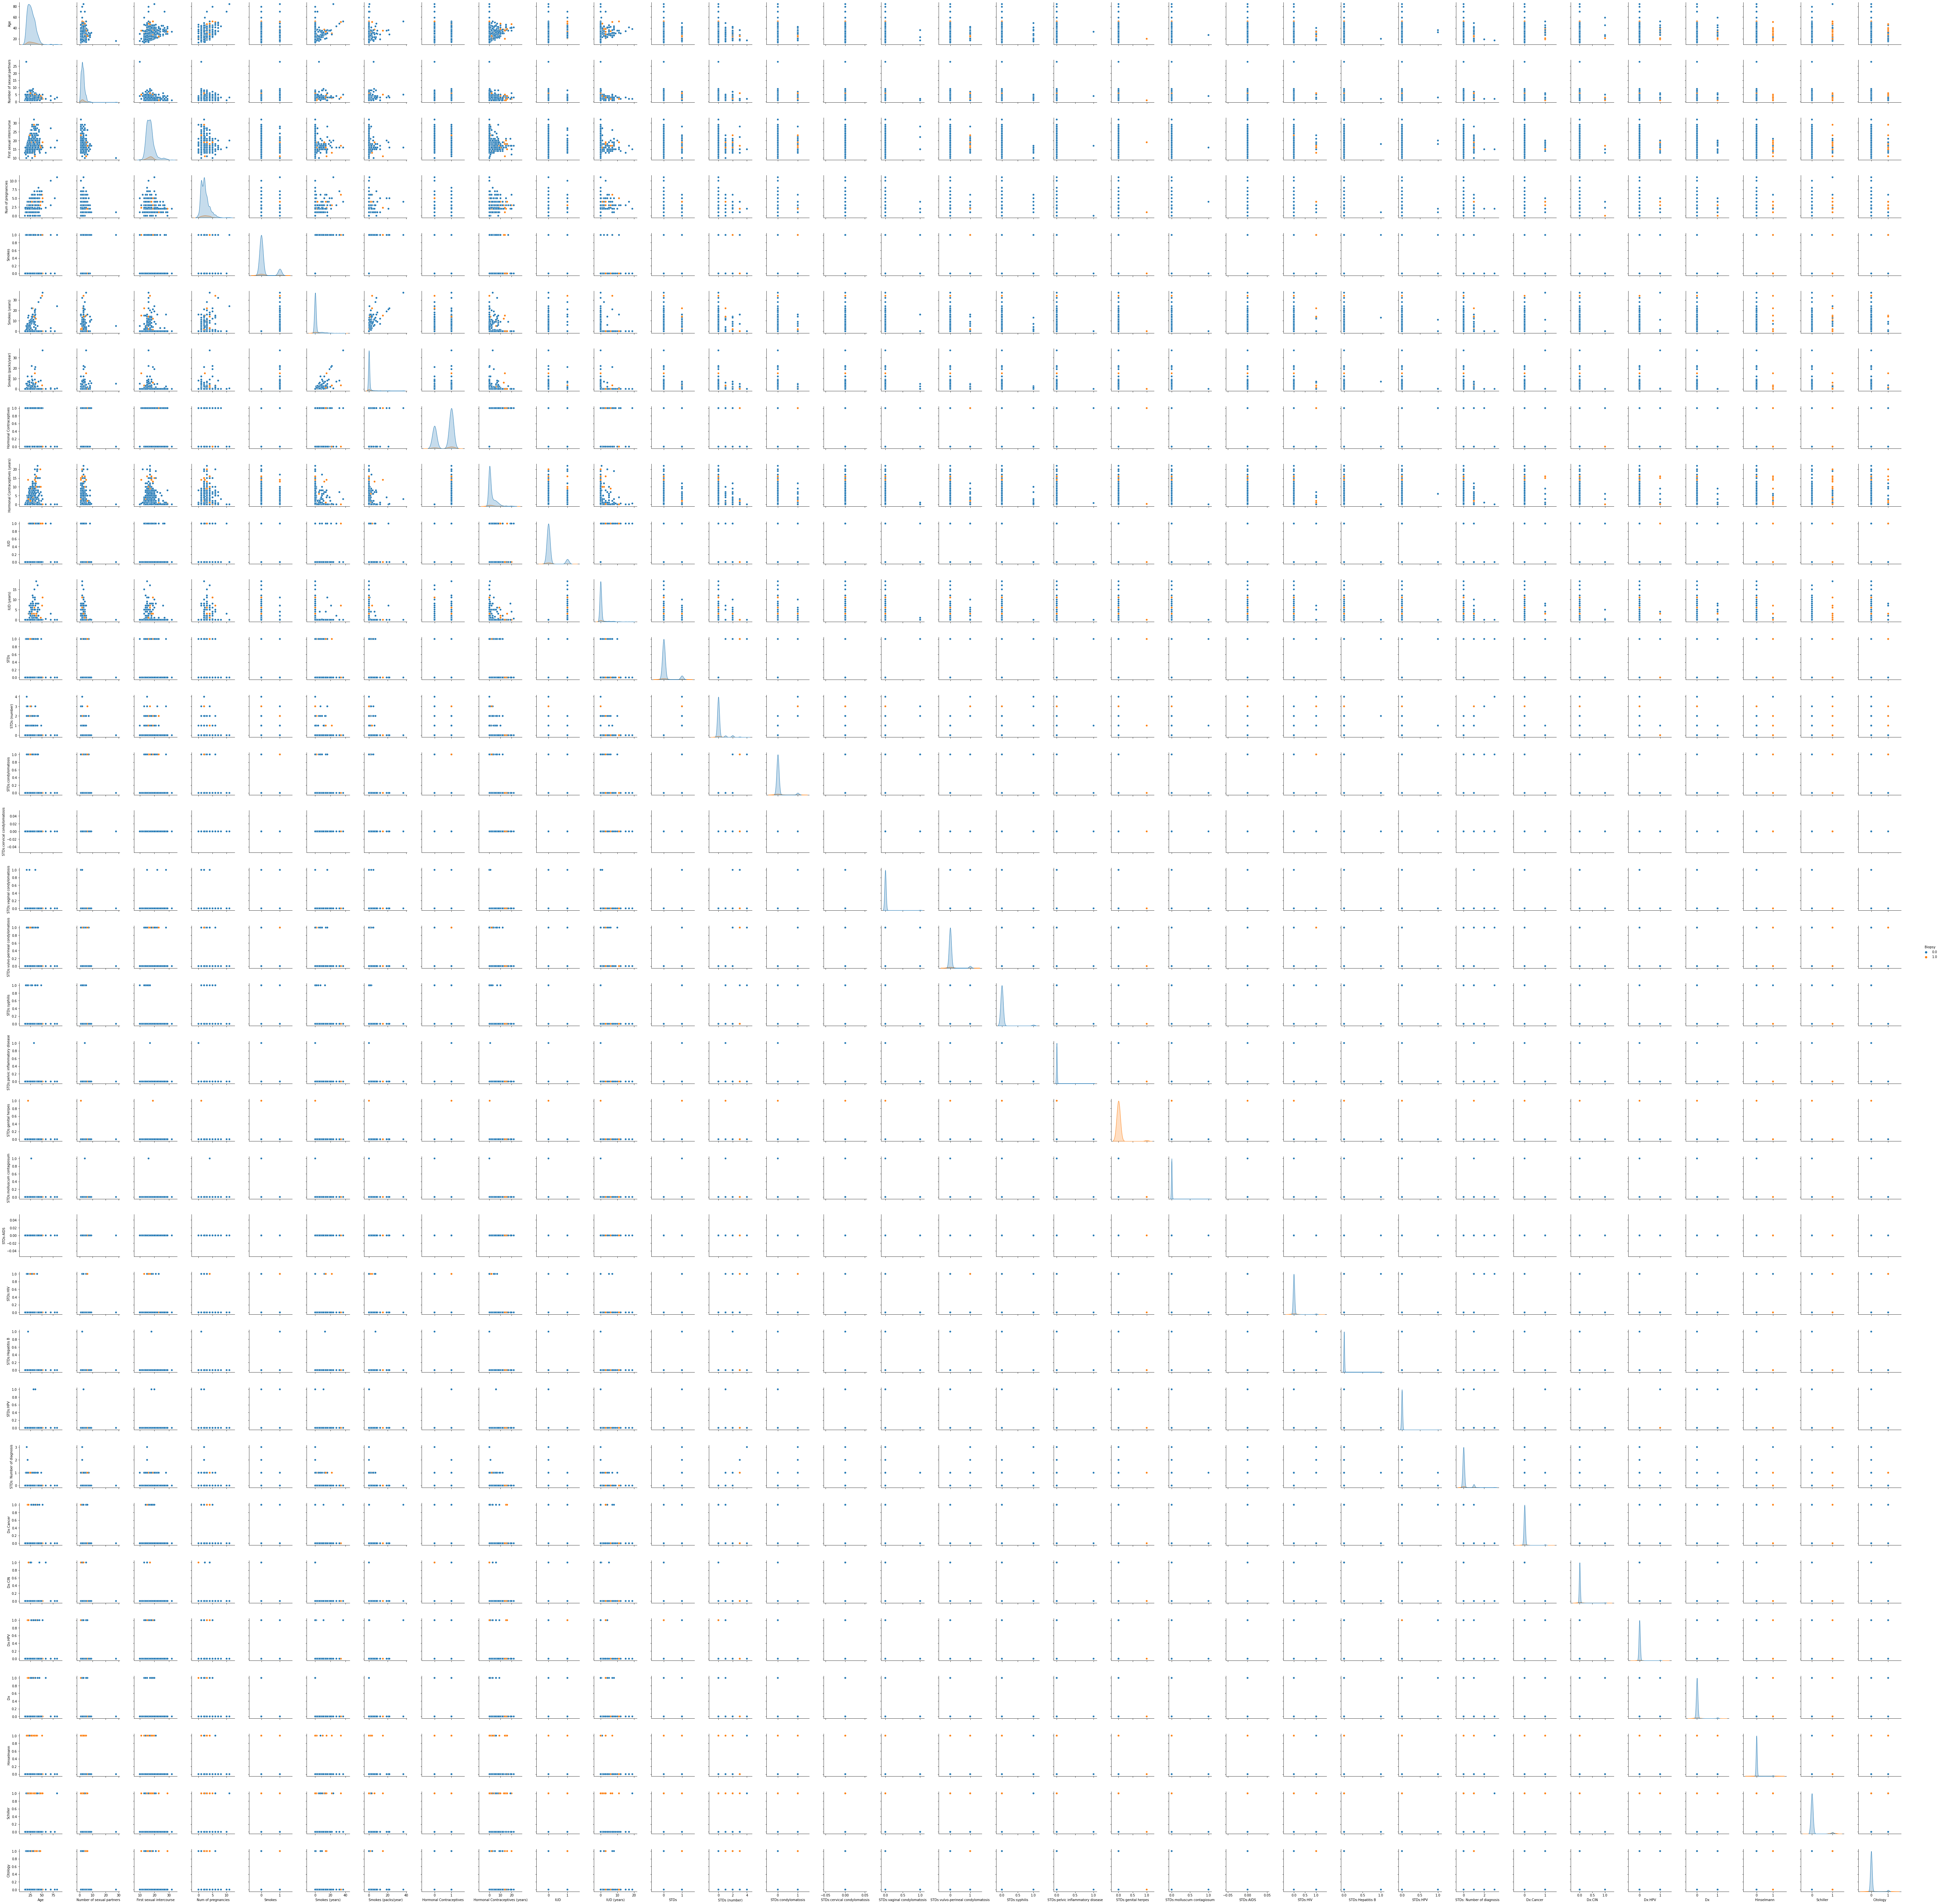

In [ ]:
sns.pairplot(data = df, hue='Biopsy')

# Method:
 
Both Random Forest and Gradient Boost algorithms were used to try and predict cancer cases using medical history and Pap smear tests. The data is unbalanced and therefore the oversampling method SMOTE was used to improve predictions. A Dummy Algorithm achieved an accuracy of 93%, making 93% the bare minimum for any prediction method.


#Models

In [ ]:

ab = pd.DataFrame()
ab['Biospy'] = df['Biopsy'] 
df = df.drop(columns='Biopsy')
li = []
for x in df:
   li = df[x]
   li = preprocessing.normalize([li])
   df[x] = li.reshape(-1,1)
   li = []
df['Biopsy'] = ab["Biospy"]




##DUMMY
 
: A dummy model was used to see how the baseline accuracy compares to just selecting the major class. The use of a dummy model was implemented due to the heavy imbalance in the datasets.

In [ ]:

dum = DummyClassifier(strategy = 'most_frequent')
dum.fit(x_train,y_train)
dum.score(x_test,y_test)


## RANDOM FORREST

Initial random forrest model to see performance with no tunning:

In [ ]:

X = df.drop(axis = 1, labels = ['Biopsy',
                                'Schiller',
                                'Hinselmann',
                                'Citology'] )
x_test, x_train, y_test, y_train = train_test_split(X,Y)
rfc = RandomForestClassifier()
score_train = cross_val_score(rfc,x_train,y_train,cv=5)
score_test = cross_val_score(rfc,x_test,y_test,cv=5)
print(np.mean(score_train))
print(np.mean(score_test))

In [ ]:
rfc_2 = RandomForestClassifier(n_estimators=1000, class_weight='balanced',ccp_alpha= .00005)
rfc_2.fit(x_train,y_train)
score_train = cross_val_score(rfc_2, x_train,y_train, cv = 5)
score_test = cross_val_score(rfc_2, x_test,y_test, cv = 5)
print(np.mean(score_train))
print(np.mean(score_test))

## Gradient Boosting 

Initial Model

In [ ]:

gbc = GradientBoostingClassifier(n_estimators=1000, learning_rate= .1, ccp_alpha= .005)
gbc.fit(x_train,y_train)
print(gbc.score(x_train,y_train))
print(gbc.score(x_test,y_test))
print(gbc.feature_importances_)

In [ ]:
features = ['STDs: Number of diagnosis',    
            'Dx:Cancer',                                           
            'Smokes (years)',                         
            'Hormonal Contraceptives (years)',      
            'Num of pregnancies',                   
            'Age',                                
            'IUD',]
X_1 = df[features]
x_train2,x_test2, y_train2,y_test2 = train_test_split(X_1,Y)

In [ ]:
gbc_2 = GradientBoostingClassifier(n_estimators=3000, min_samples_split= 4, learning_rate= .0001,ccp_alpha= .0001, max_depth=2, subsample=.8)
gbc_2.fit(x_train2,y_train2)
print(
gbc_2.score(x_train2,y_train2),
gbc_2.score(x_test2,y_test2))

In [ ]:
gbc0 = GradientBoostingClassifier(random_state=8)
gbc0.fit(x_train2,y_train2)
y_pred = gbc0.predict(x_test2)
print( confusion_matrix(y_test2,y_pred, normalize='true'))
print(classification_report(y_test2, y_pred))

In [ ]:
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.005,n_estimators=100, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(x_train,y_train)
tuning.best_params_, tuning.best_score_

In [ ]:
model1 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=100,max_depth=2, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
model1.fit(x_train,y_train)
predictors=list(x_train)
feat_imp = pd.Series(model1.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(model1.score(x_test, y_test)))
pred=model1.predict(x_test)
print(classification_report(y_test, pred))

### Including Pap smears and Schiller (Citology test)


In [ ]:
features_1 = ['STDs: Number of diagnosis',    
            'Dx:Cancer',                                           
            'Smokes (years)',                         
            'Hormonal Contraceptives (years)',      
            'Num of pregnancies',                   
            'Age',                                
            'IUD',
            'Citology',
            'Schiller']
x_3 = df[features_1]
x_train3, x_test3,y_train3,y_test3 = train_test_split(x_3,Y)
oversample = SMOTE()
x_train_os, y_train_os = oversample.fit_resample(x_train3,y_train3)
print(Counter(y_train_os))
from imblearn.under_sampling import RandomUnderSampler


gbc1 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=100,max_depth=2, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
gbc1.fit(x_train_os,y_train_os)
y_pred = gbc1.predict(x_test3)
print( confusion_matrix(y_test3,y_pred, normalize='true'))
print(classification_report(y_test3, y_pred))

Counter({0.0: 507, 1.0: 507})
[[0.9704142  0.0295858 ]
 [0.07692308 0.92307692]]
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       169
         1.0       0.71      0.92      0.80        13

    accuracy                           0.97       182
   macro avg       0.85      0.95      0.89       182
weighted avg       0.97      0.97      0.97       182



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
p_test ={'learning_rate':[0.2,0.15,0.1, 0.25,], 'n_estimators':[50,100,250,]}
tuning = GridSearchCV(estimator=GradientBoostingClassifier(max_depth=2, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(x_train_os,y_train_os)
tuning.best_estimator_, tuning.best_score_,tuning.best_params_


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


(GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.15, loss='deviance', max_depth=2,
                            max_features='sqrt', max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=250,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=10, subsample=1, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 0.9753597034580306,
 {'learning_rate': 0.15, 'n_estimators': 250})

In [ ]:
gbc1 = GradientBoostingClassifier(learning_rate=0.15, n_estimators=250, max_depth=5,)
gbc1.fit(x_train_os,y_train_os)
y_pred = gbc1.predict(x_test3)
print(classification_report(y_test3,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       169
         1.0       0.69      0.69      0.69        13

    accuracy                           0.96       182
   macro avg       0.83      0.83      0.83       182
weighted avg       0.96      0.96      0.96       182



In [ ]:
p_test2 = {'max_depth':[2,3,4,5,6,7,1] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier( learning_rate=0.15,n_estimators=100, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(x_train_os,y_train_os)
tuning.best_params_, tuning.best_score_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'max_depth': 5}, 0.9773350241428084)

In [ ]:
p_test3 = {'subsample':[.1, .2,.3,.4,.5,.6,.7,.8,.9,.10] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.15,n_estimators=100, min_samples_split=2, min_samples_leaf=1,max_features='sqrt',max_depth=2, random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(x_train_os,y_train_os)
tuning.best_params_, tuning.best_score_


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'subsample': 0.9}, 0.9753645807930547)

### Tunning Model

In [ ]:
p_test ={'learning_rate':[0.2,0.15,0.1, 0.25,], 'n_estimators':[50,100,250,500, 1000, 2000]}
tuning = GridSearchCV(estimator=GradientBoostingClassifier(max_depth=2, min_samples_split=2, min_samples_leaf=1, subsample=.95,max_features='sqrt', random_state=10), 
            param_grid = p_test, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(x_train_os,y_train_os)
tuning.best_estimator_, tuning.best_score_,tuning.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


(GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.15, loss='deviance', max_depth=2,
                            max_features='sqrt', max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=250,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=10, subsample=0.95, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 0.9753597034580306,
 {'learning_rate': 0.15, 'n_estimators': 250})

In [ ]:
gbc1 = GradientBoostingClassifier(learning_rate=0.2, n_estimators=1000,max_depth=2, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
gbc1.fit(x_train_os,y_train_os)
y_pred = gbc1.predict(x_test4)
print( confusion_matrix(y_test4,y_pred, normalize='true'))
print(classification_report(y_test4, y_pred))

In [ ]:
p_test2 = {'max_depth':[2,3,4,5,6,7,1] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier( learning_rate=0.15,n_estimators=100, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(x_train_os,y_train_os)
tuning.best_params_, tuning.best_score_

### All Features  (Excluding Hinselmann as it is majorly invasive)

In [ ]:
# Initial Model 
feature = df.drop(axis= 1, columns=['Biopsy', 'Hinselmann']  )
x_train5, x_test5,y_train5,y_test5 = train_test_split(feature,Y,)
oversample = SMOTE()
x_train_os, y_train_os = oversample.fit_resample(x_train5,y_train5)
print(Counter(y_train_os))
gbc1 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=100,max_depth=2, min_samples_split=2, min_samples_leaf=1, subsample=1, random_state=10)
gbc1.fit(x_train_os,y_train_os)
y_pred = gbc1.predict(x_test5)
print( confusion_matrix(y_test5,y_pred, normalize='true'))
print(classification_report(y_test5, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0.0: 507, 1.0: 507})
[[0.94674556 0.05325444]
 [0.         1.        ]]
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97       169
         1.0       0.59      1.00      0.74        13

    accuracy                           0.95       182
   macro avg       0.80      0.97      0.86       182
weighted avg       0.97      0.95      0.96       182



A recall of 1 indicatates there were no missed cases, however  a precision of 0.47  means that 53% of cases are a false positive

In [ ]:
p_test ={'learning_rate':[1E-20,1E-10,1E-5,1E-1], 'n_estimators':[50,100,250,500, 1000, 2000]}
tuning = GridSearchCV(estimator=GradientBoostingClassifier(max_depth=3, min_samples_split=5, min_samples_leaf=1, subsample=.9, random_state=10), 
            param_grid = p_test, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(x_train_os,y_train_os)
tuning.best_estimator_, tuning.best_score_,tuning.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


(GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=5,
                            min_weight_fraction_leaf=0.0, n_estimators=250,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=10, subsample=0.9, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 0.9723894064283275,
 {'learning_rate': 0.1, 'n_estimators': 250})

BEST MODEL BELOW 

In [ ]:
gbc1 = GradientBoostingClassifier(learning_rate=.01 , n_estimators=250,max_depth=2, min_samples_split=4, min_samples_leaf=2,subsample=1,  )
gbc1.fit(x_train_os,y_train_os)
print(gbc1.score(x_train_os,y_train_os))
y_pred = gbc1.predict(x_test5)
print( confusion_matrix(y_test5,y_pred, normalize='true'))
print(classification_report(y_test5, y_pred))


0.97534516765286
[[0.95266272 0.04733728]
 [0.         1.        ]]
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98       169
         1.0       0.62      1.00      0.76        13

    accuracy                           0.96       182
   macro avg       0.81      0.98      0.87       182
weighted avg       0.97      0.96      0.96       182



In [ ]:
gbc1 = GradientBoostingClassifier(learning_rate=.01 , n_estimators=1000,max_depth=3, min_samples_split=6, min_samples_leaf=1,subsample=.8, random_state=10 )
gbc1.fit(x_train_os,y_train_os)
print(gbc1.score(x_train_os,y_train_os))
y_pred = gbc1.predict(x_test5)
print( confusion_matrix(y_test5,y_pred, normalize='true'))
print(classification_report(y_test5, y_pred))

0.9980237154150198
[[0.97647059 0.02352941]
 [0.08333333 0.91666667]]
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       170
         1.0       0.73      0.92      0.81        12

    accuracy                           0.97       182
   macro avg       0.86      0.95      0.90       182
weighted avg       0.98      0.97      0.97       182



###FINAL MODEL

In [ ]:
gbc1 = GradientBoostingClassifier(learning_rate=.0000000000001 , n_estimators=1000,max_depth=3, min_samples_split=6, min_samples_leaf=2,subsample=1, )
gbc1.fit(x_train_os,y_train_os)
print(gbc1.score(x_train_os,y_train_os))
y_pred = gbc1.predict(x_test5)
print( confusion_matrix(y_test5,y_pred, normalize='true'))
print(classification_report(y_test5, y_pred))

0.983201581027668
[[0.97647059 0.02352941]
 [0.08333333 0.91666667]]
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       170
         1.0       0.73      0.92      0.81        12

    accuracy                           0.97       182
   macro avg       0.86      0.95      0.90       182
weighted avg       0.98      0.97      0.97       182



# Results:
 
Using  the Gradient Boosting algorithm provided by Sklearn, and then tuning the parameters a prediction accuracy of 97% was achieved. 
 
The algorithm did not miss any cancer cases, resulting in 0 false negatives.  The algorithm did  have false positives. However, the algorithm had a false positive rate of 2.9%. A pap smear alone has a false positive rate of 10%. 
 
The algorithm reduced false positives by about 7%, significantly reducing the amount of unnecessary colonoscopy. In addition to avoiding surgery patients are save time, money and worry.


# Recommendations
 
1) The data set was fairly limited with only a little more than 500 cases, a more extensive study with more data is required
 
2) Of the 500 cases only about 10% had cervical cancer. With only 50 positive cases, oversampling can lead to the algorithm overfitting this data, even with splitting the data into a train and test set. 
 
3) Doctors should include basic medical background questions in their analysis of pap smear tests. Using this algorithm they can get a more accurate assessment of their patients risk for cervical cancer
